In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('portfolio_by_percentile_income.csv')
df = df.dropna()
df = df.reset_index(drop=True)
df['Category'] = df['Category'].replace('Less than 20', '0-19.9')
df

,year,Category,Before_Tax_Income,Net_Worth,Assets,Financial_Assets,Transaction_Accounts,Certificates_of_Deposit,Savings_Bonds,Directly_Held_Bonds,...,Other_Res_Real_Estate_Debt,Installment_Loans,Other_Lines_of_Credit,Credit_Card_Balances,Other_Debt,Mortgages_Home_Equity_Loans,Home_Equity_Lines_of_Credit,Vehicle_Installment_Loans,Education_Installment_Loans,Other_Installment_Loans
0,1989,0-19.9,13.780173,56.942249,79.443962,27.732660,8.017971,48.734943,8.317115,103.257740,...,22.251492,7.566147,2.913861,1.224967,9.254110,30.038019,0.023056,6.652656,12.014014,3.363302
1,1989,20-39.9,33.928295,156.922360,183.326860,54.506790,18.348392,52.786194,8.485620,80.253548,...,76.112000,11.668891,4.244487,2.715609,7.381679,45.571239,50.463356,10.107100,7.839725,7.900451
2,1989,40-59.9,59.852680,236.637180,276.564730,73.670097,18.151831,64.012230,9.696363,89.487938,...,54.075775,20.383545,3.815018,3.769754,8.701967,64.727448,26.266727,15.457402,16.907787,13.883785
3,1989,60-79.9,94.425240,314.914460,394.722530,121.713580,24.129520,67.682571,8.094541,117.338090,...,47.396179,24.226437,7.124289,4.445293,17.733366,96.300453,56.806026,19.445471,14.589732,14.355100
4,1989,80-89.9,141.319180,515.636840,627.096130,169.664550,32.595890,52.087276,4.914540,151.271970,...,83.642746,22.414436,25.212332,5.117762,30.051466,112.161950,61.195175,21.313755,8.382180,9.100932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2022,20-39.9,42.869774,196.314190,241.150850,64.043343,16.410561,72.291214,13.978066,339.619600,...,94.336731,25.494701,2.520306,3.841465,16.846624,104.315410,24.030542,15.966981,33.531185,9.819519
67,2022,40-59.9,71.218353,411.094700,501.496640,144.581150,25.195541,61.984596,10.130759,120.496010,...,86.803108,30.195856,13.892957,5.951111,11.944118,139.043010,32.107403,17.631966,39.828651,5.994111
68,2022,60-79.9,116.921710,596.073850,746.025090,262.069370,44.074169,45.466682,5.500523,600.352720,...,138.903900,40.860394,28.824181,7.438102,14.025350,191.364150,36.513481,21.661695,49.182549,8.424585
69,2022,80-89.9,192.804470,1313.272500,1535.335900,695.556270,76.937378,81.637535,15.499785,223.918580,...,178.320600,53.299061,62.474682,8.901183,35.096771,254.962740,37.103588,23.178225,73.342201,14.198748


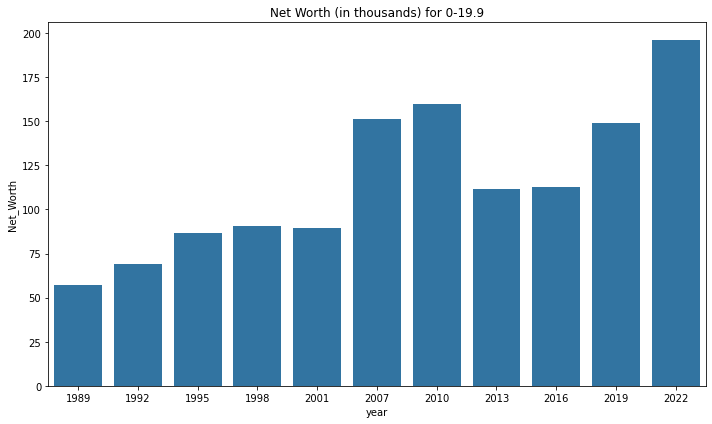

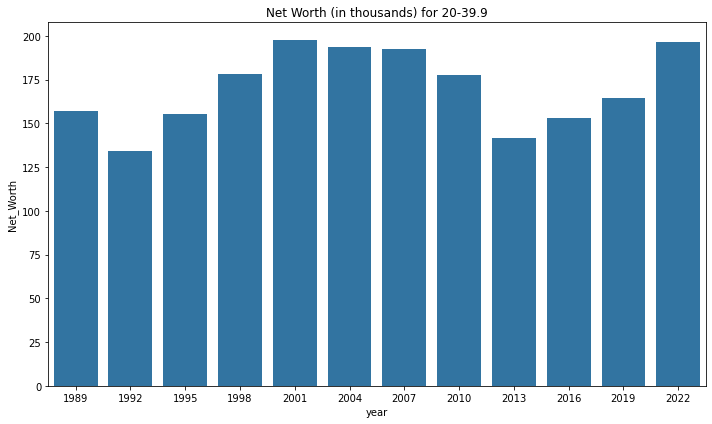

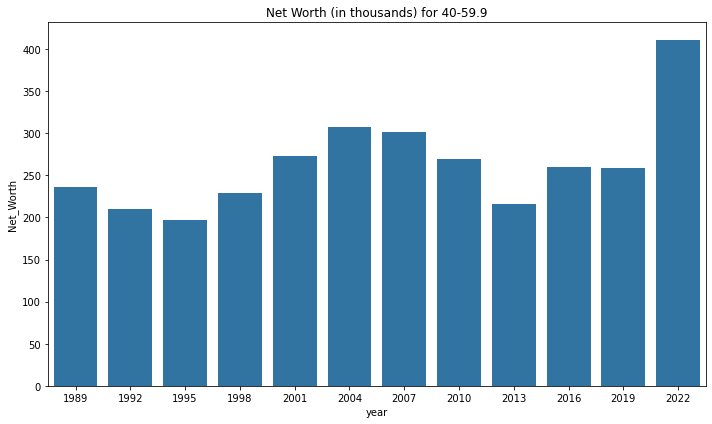

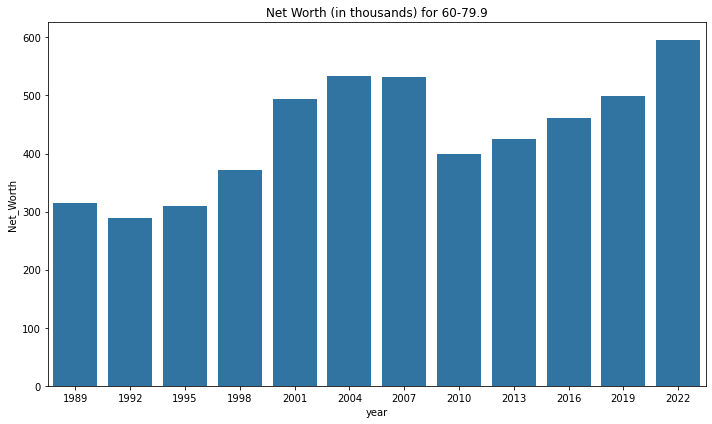

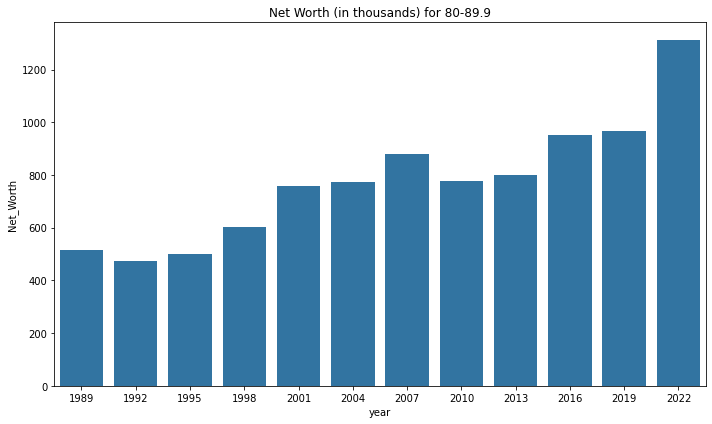

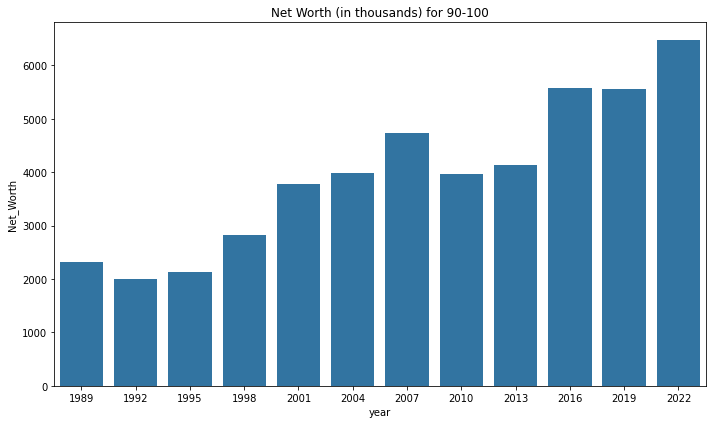

In [3]:
categories = ['0-19.9', '20-39.9', '40-59.9', '60-79.9', '80-89.9', '90-100']

for category in categories:
    filtered_df = df[df['Category'] == category]
    filtered_df = filtered_df.reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='year', y='Net_Worth', data=filtered_df)
    plt.title(f'Net Worth (in thousands) for {category}')
    plt.tight_layout()
    plt.show()

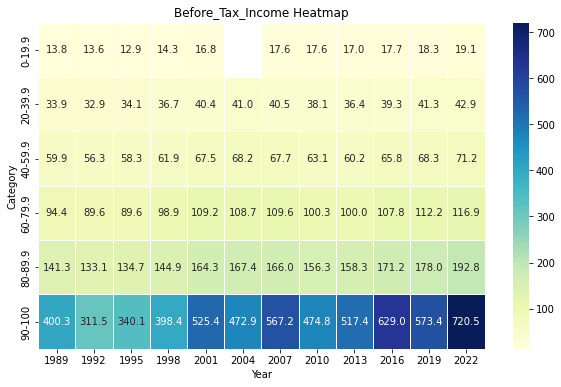

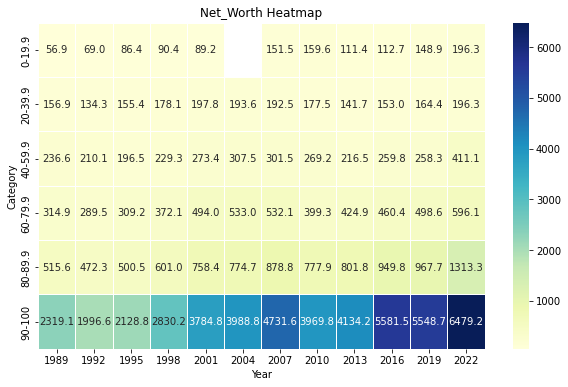

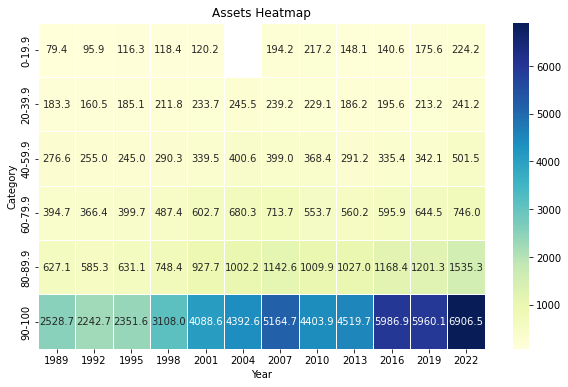

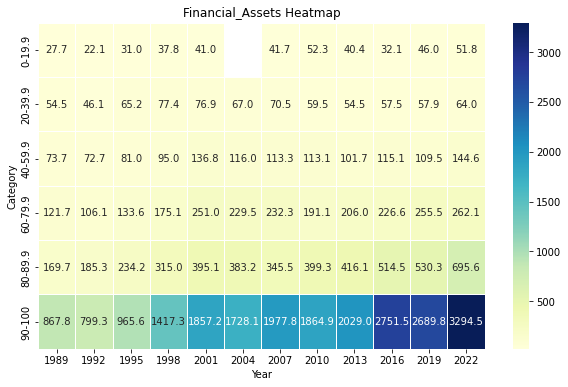

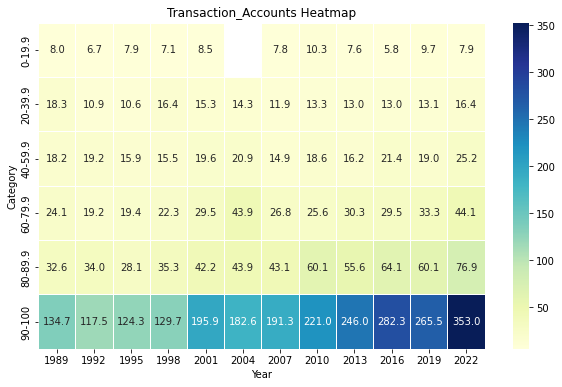

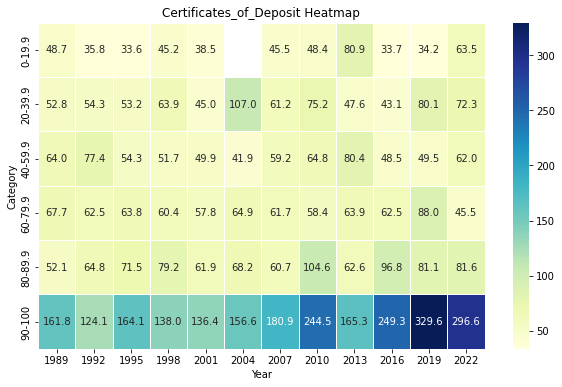

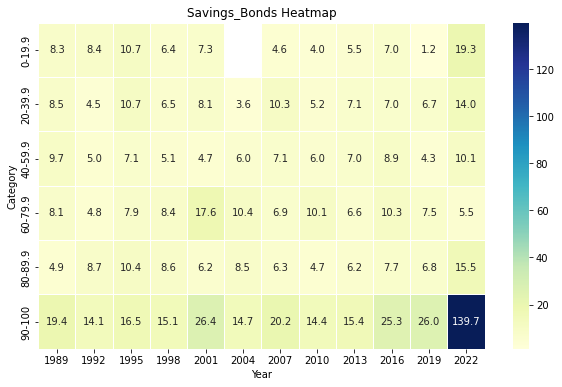

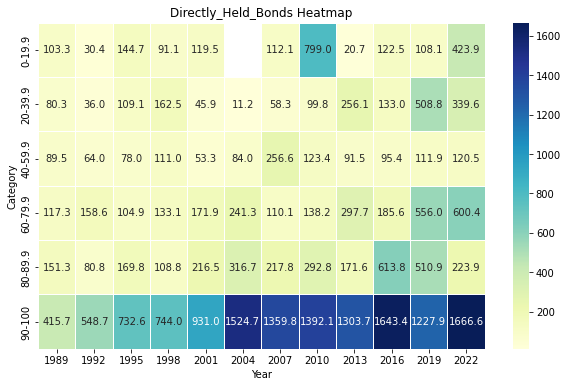

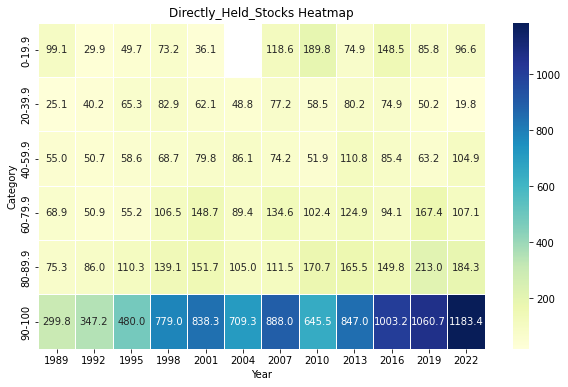

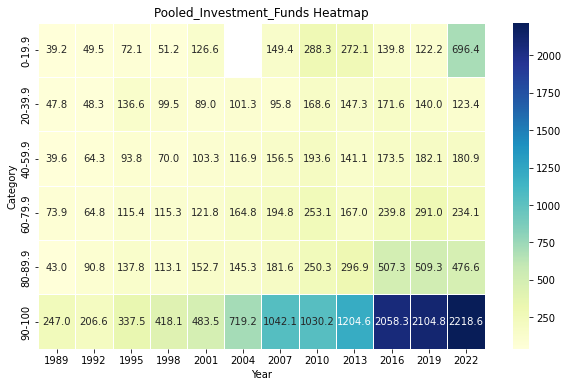

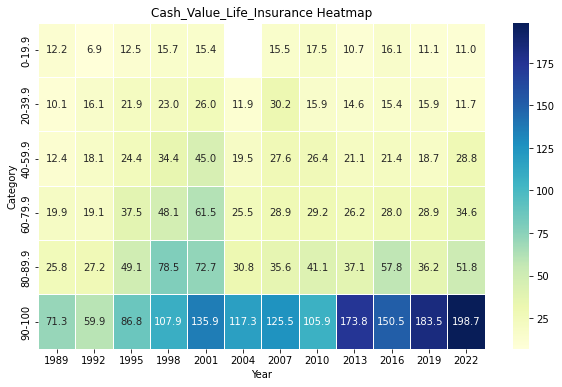

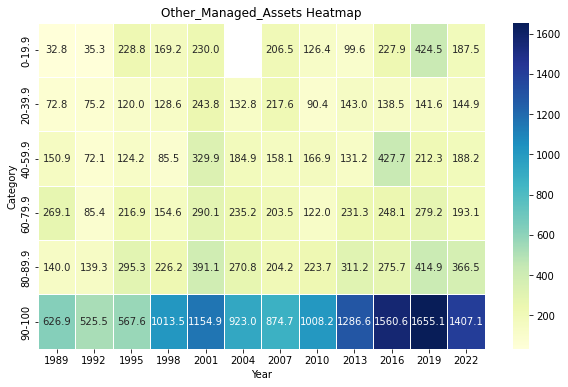

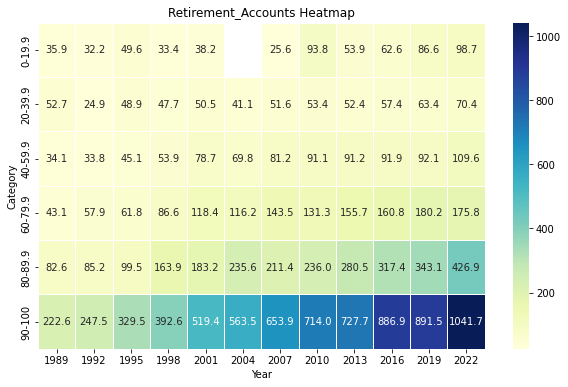

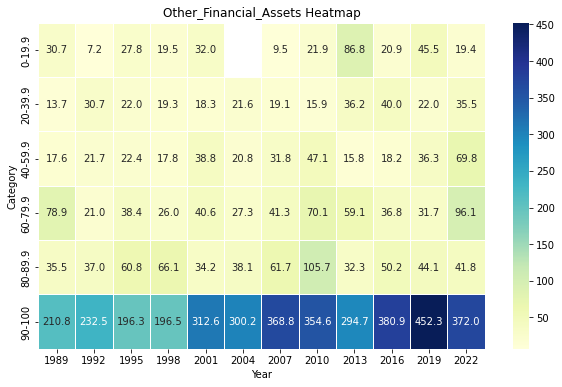

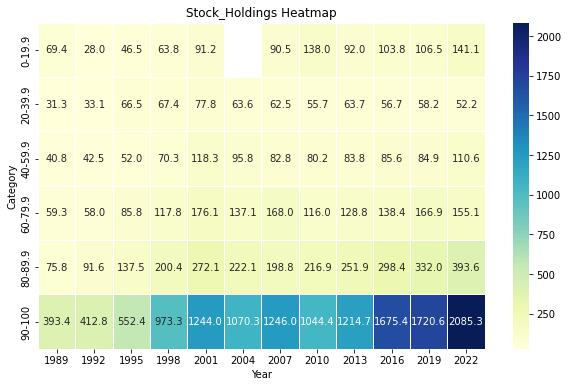

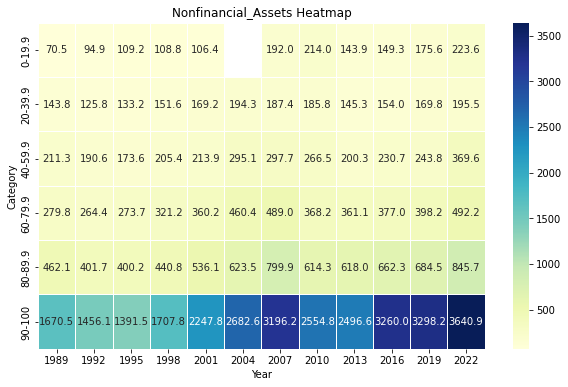

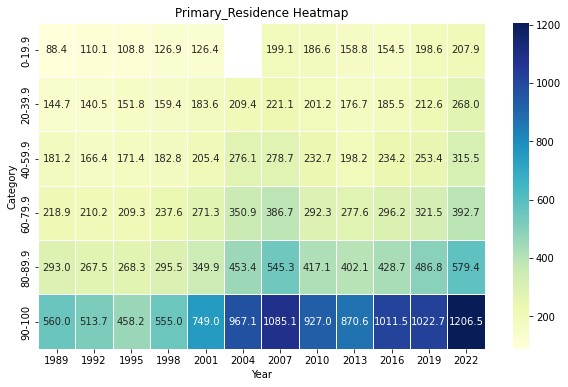

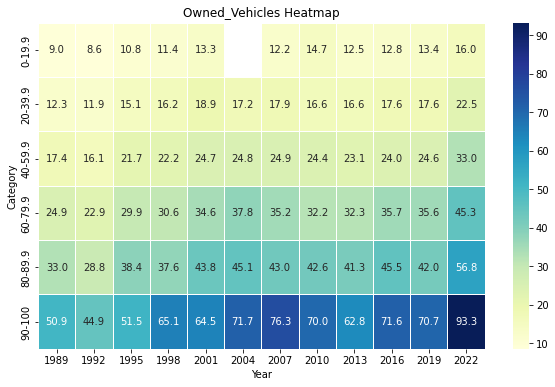

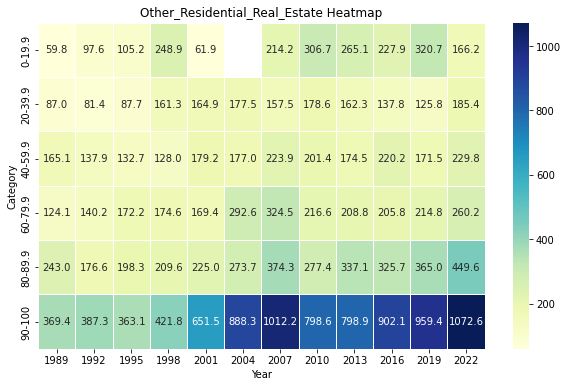

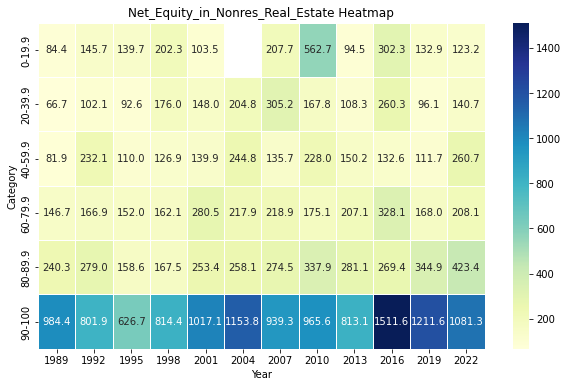

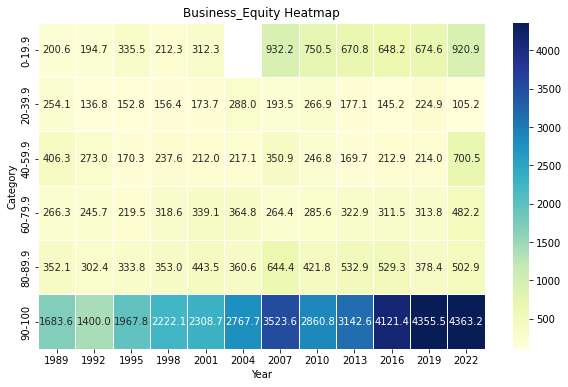

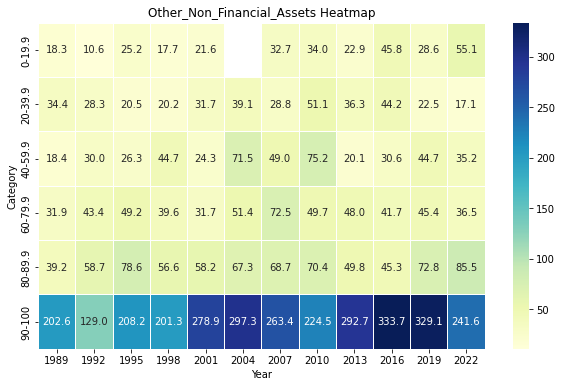

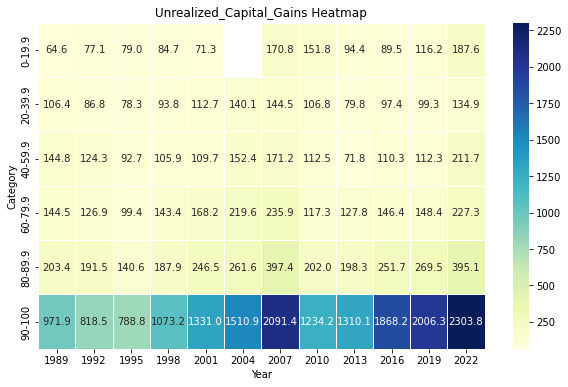

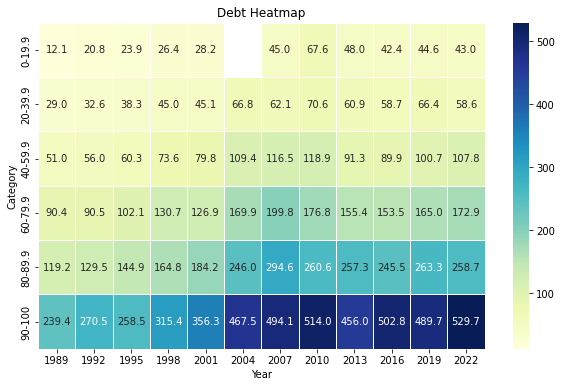

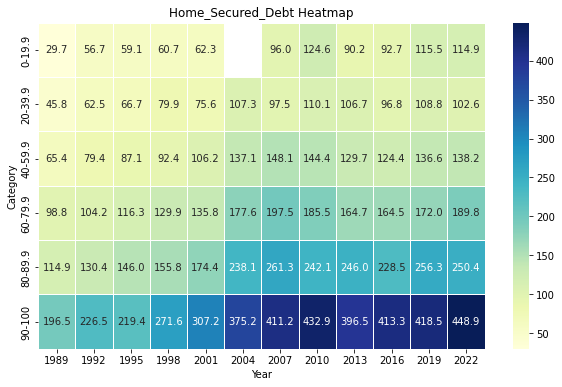

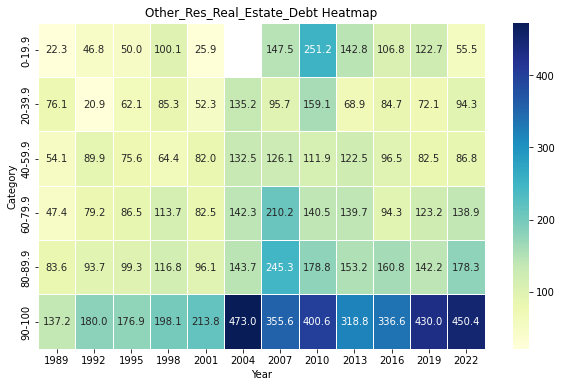

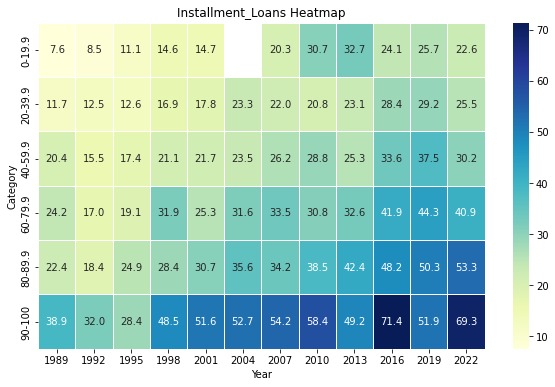

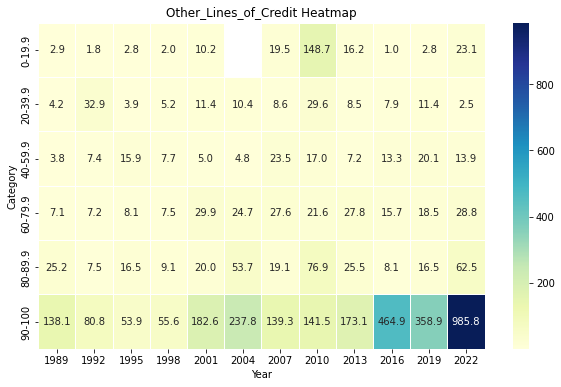

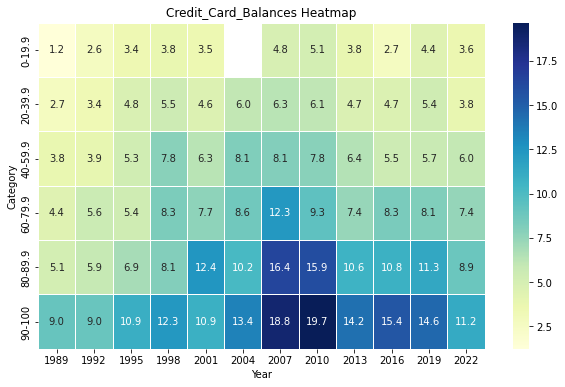

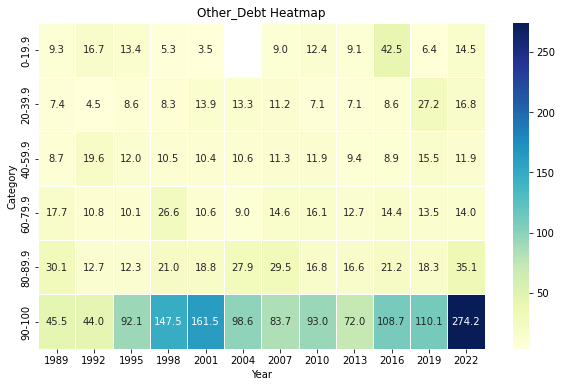

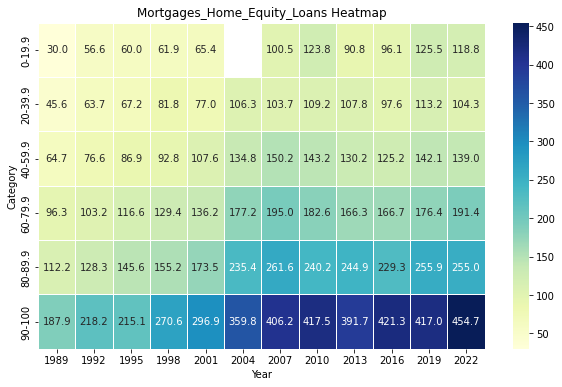

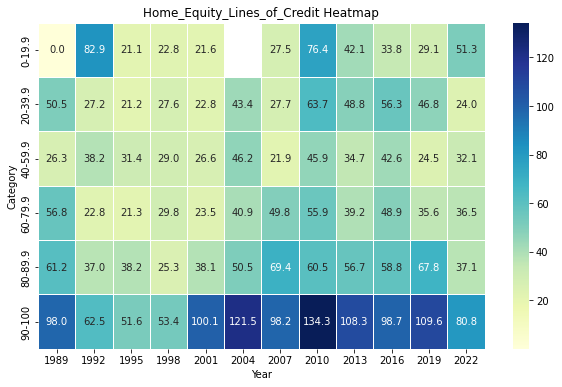

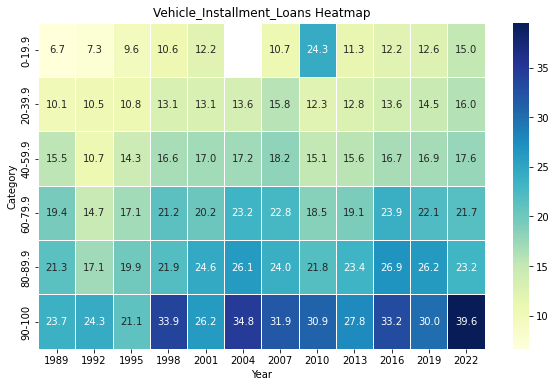

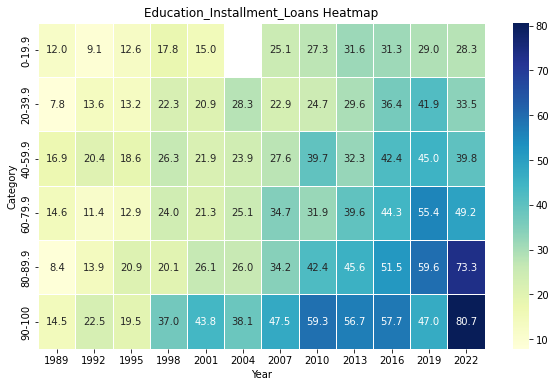

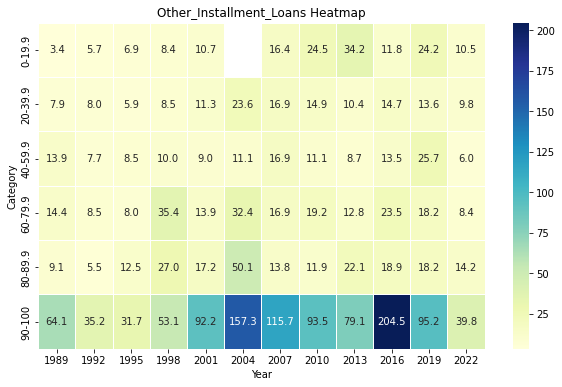

In [4]:
column_names = df.columns.tolist()

column_names = column_names[2:]

for col in column_names:
    pivot_df = df.pivot(index='Category', columns='year', values=col)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f'{col} Heatmap')
    plt.xlabel('Year')
    plt.ylabel('Category')
    plt.show()